# **Law Strategy Prediction System for Motor Traffic Accidents based on the Legal Framework of Sri Lanka by Image Processing & Neural Networks**

**Student Number: PS/2019/259**

**Name: S.A. Weerasinghe**

**Model No.01  : Road Accident Type classification in Image Processing with the Convoulution Neural Network (CNN) [After Data Augmentation- Brightening, Contrasting, Sharpening, and Zooming]**

**Date: 01/12/2024**


**IMPORT NECESSARY LIBRARIES**

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT GOOGLE DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CHANGE THE CURRENT WORKING DIRECTORY**

In [3]:
os.chdir("/content/drive/My Drive/MY_RESEARCH/Experiment-03-CNN-Image-Classification/")
os.getcwd()

'/content/drive/My Drive/MY_RESEARCH/Experiment-03-CNN-Image-Classification'

**LOAD AND DISPLAY AN IMAGE FROM THE DATASET TO VERIFY THE CONNECTION**

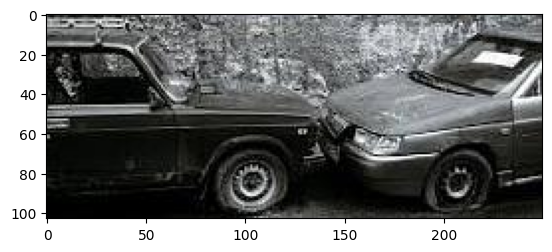

In [4]:
#Specify the location to the image in my Training dataset and load the image using load_img from Keras
img = image.load_img("Training/1_Head_On_Collision/Copy of HO_img49_sharpen.jpg")

#Display the loaded image using matplotlib
plt.imshow(img)


In [5]:
# Read the image using OpenCV (cv2) and retrieve its shape
cv2.imread("Training/1_Head_On_Collision/Copy of HO_img49_sharpen.jpg").shape

(103, 250, 3)

In [6]:
# Create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)


**CREATE TRAINING DATASET BY USING ImageDataGenerator**

In [7]:
# Create a training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('Training/', target_size = (240,200),batch_size = 16, class_mode = 'categorical')

Found 1260 images belonging to 4 classes.


In [8]:
# Display the mapping of class names to their indices in the training dataset
train_dataset.class_indices

{'1_Head_On_Collision': 0,
 '2_Rear_End_Collision': 1,
 '3_Single_Vehicle_Accident': 2,
 '4_T_Bone_Collision': 3}

In [9]:
# Retrieve the array of class indices for each sample in the training dataset
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

**THE CNN ARCHITECTURE SPECIFICATION - THE SEQUENTIAL MODEL**

In [14]:
import tensorflow as tf

# Create a Sequential model
model = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
    tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02), input_shape=(240, 200, 3)),
    # Batch Normalization for better convergence and regularization
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with pool size (2, 2)
    tf.keras.layers.MaxPool2D(3, 3),

    # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
    tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    # Batch Normalization
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with pool size (2, 2)
    tf.keras.layers.MaxPool2D(3, 3),

    # Convolutional layer with 128 filters, each of size (3, 3), and ReLU activation
    tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    # Batch Normalization
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with pool size (2, 2)
    tf.keras.layers.MaxPool2D(3, 3),

    # Flatten layer to convert 3D feature maps to 1D feature vectors
    tf.keras.layers.Flatten(),

    # Dense (fully connected) layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    # Dropout to prevent overfitting
    tf.keras.layers.Dropout(0.5),

    # Output layer with 4 units and softmax activation for multi-class classification
    tf.keras.layers.Dense(4, activation='softmax')  # 4 = number of classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 237, 197, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 237, 197, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 79, 65, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 76, 62, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 76, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 25, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 22, 17, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 22, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4480)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         573,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 740,580 (2.83 MB)

 Trainable params: 740,132 (2.82 MB)

 Non-trainable params: 448 (1.75 KB)

**CREATE THE VALIDATION DATASET**

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load validation data
validation_dataset = validation_datagen.flow_from_directory(
    'Validation/',  # Path to the validation folder
    target_size=(240, 200),  # Resize images to the same size as training images
    batch_size=16,          # Batch size
    class_mode='categorical'  # Multi-class classification
)


Found 360 images belonging to 4 classes.


**TRAIN THE MODEL WITH THE TRAINING DATASET**

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model using the training dataset with validation
model_fit = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)





Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.2878 - loss: 14.2316 - val_accuracy: 0.2583 - val_loss: 12.8880
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.5530 - loss: 12.2979 - val_accuracy: 0.2972 - val_loss: 12.8873
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6694 - loss: 11.8207 - val_accuracy: 0.2861 - val_loss: 12.6146
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7676 - loss: 11.4156 - val_accuracy: 0.3222 - val_loss: 12.1740
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.8403 - loss: 11.0454 - val_accuracy: 0.4778 - val_loss: 11.5976
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8822 - loss: 10.7155 - val_accuracy: 0.7028 - val_loss: 10.9669
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.9053 - loss: 10.4387 - val_accuracy: 0.8222 - val_loss: 10.4789
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9059 - loss: 10.1543 - val_accuracy: 0.8694

**SAVE THE TRAINED MODEL**

In [17]:
# Save model to Google Drive
model.save('/content/drive/MyDrive/MY_RESEARCH/Experiment-03-CNN-Image-Classification/models/version19-CNN-sequential.h5')

**TESTING THE DATA**

In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained CNN model
model = load_model('/content/drive/MyDrive/MY_RESEARCH/Experiment-03-CNN-Image-Classification/models/version19-CNN-sequential.h5')

# Path to the Testing dataset - Double-check this path for accuracy
testing_dir = '/content/drive/My Drive/MY_RESEARCH/Experiment-03-CNN-Image-Classification/Testing'

# Mapping accident type names to numbers - Verify case sensitivity matches directory names
accident_type_mapping = {
    '1_Head_On_Collision': 0,
    '2_Rear_End_Collision': 1,  # Make sure this matches the actual directory name
    '3_Single_Vehicle_Accident': 2,
    '4_T_Bone_Collision': 3
}

# Reverse mapping: numbers to accident type names
number_to_accident_type = {v: k.split('_', 1)[1] for k, v in accident_type_mapping.items()}

# Function to display an image along with its prediction and true label
def display_prediction(img_path, true_label_num, predicted_label_num):
    true_label = number_to_accident_type[true_label_num]
    predicted_label = number_to_accident_type[predicted_label_num]

    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.show()

# Debugging step: Print all directories in the testing_dir
print("Subdirectories in testing_dir:")
if os.path.exists(testing_dir):
    print(os.listdir(testing_dir))
else:
    print(f"Testing directory not found: {testing_dir}")

# Predict individual images
for class_name, class_num in accident_type_mapping.items():
    class_path = os.path.join(testing_dir, class_name)

    # Check if class directory exists
    if not os.path.exists(class_path):
        print(f"Directory not found: {class_path}")
        continue

    print(f"Processing images in directory: {class_path}")
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = load_img(img_path, target_size=(240, 200))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            prediction = model.predict(img_array)
            predicted_label_num = np.argmax(prediction)

            display_prediction(img_path, class_num, predicted_label_num)

        except Exception as e:
            print(f"Error processing image: {img_path}. Error: {e}")


Output hidden; open in https://colab.research.google.com to view.

**PLOTS OF ACCURACY AND THE LOSS**

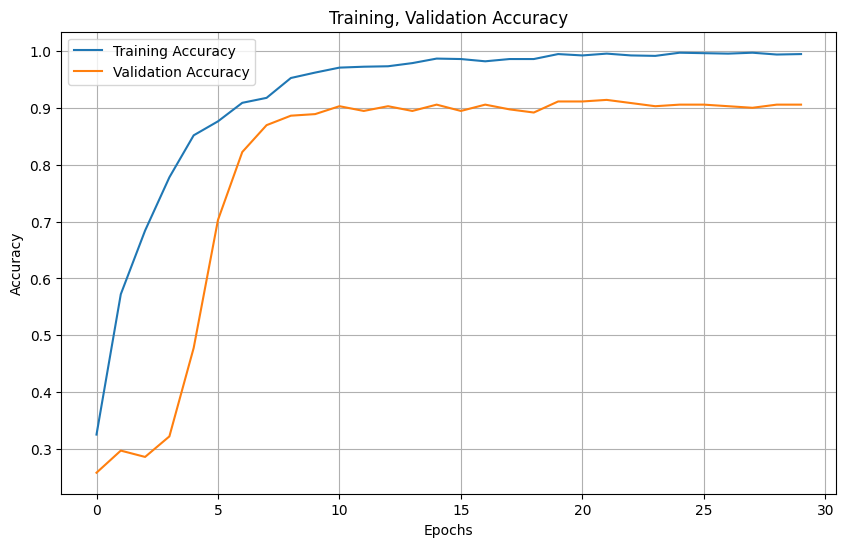

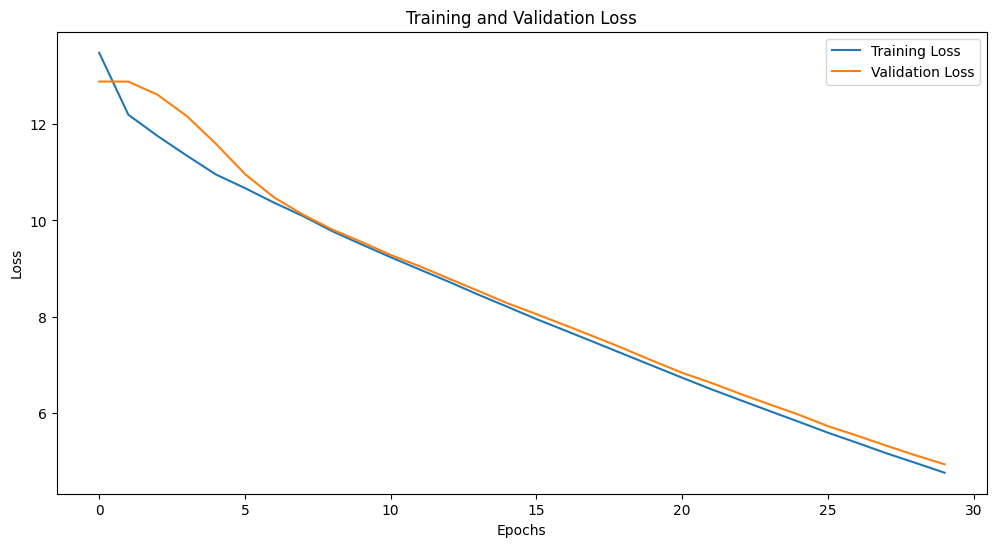

In [19]:

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training, Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**AVERAGE ACCURACY OVER ALL EPOCHS**

In [20]:
avg_accuracy = np.mean(model_fit.history['accuracy'])
print(f"Average accuracy over all epochs: {avg_accuracy}")

Average accuracy over all epochs: 0.9195238014062246


**ACCURACY ON THE TEST DATA (REAL EVALUATION)**

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for test dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale if needed, adjust based on your setup

# Load the test data from the 'Testing' folder
test_dataset = test_datagen.flow_from_directory(
    'Testing/',  # Path to your test data folder
    target_size=(240, 200),  # Match the input size expected by your model
    batch_size=16,  # Set the batch size
    class_mode='categorical' , # Use 'categorical' if multi-class classification
    shuffle=False
)

# Now the test dataset is ready to be used for evaluation
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

Found 180 images belonging to 4 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 509ms/step - accuracy: 0.5523 - loss: 6.0217
Test accuracy: 0.5777778029441833


### **PERFORMANCE EVALUATION WITH THE CONFUSION MATRIX**

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your test ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    directory='Testing/',  # Path to your test dataset
    target_size=(240, 200),            # Replace with your input image size
    batch_size=16,                    # Adjust batch size
    class_mode='categorical',         # Ensure it matches your output format
    shuffle=False                     # Keep the order of images
)


Found 180 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step


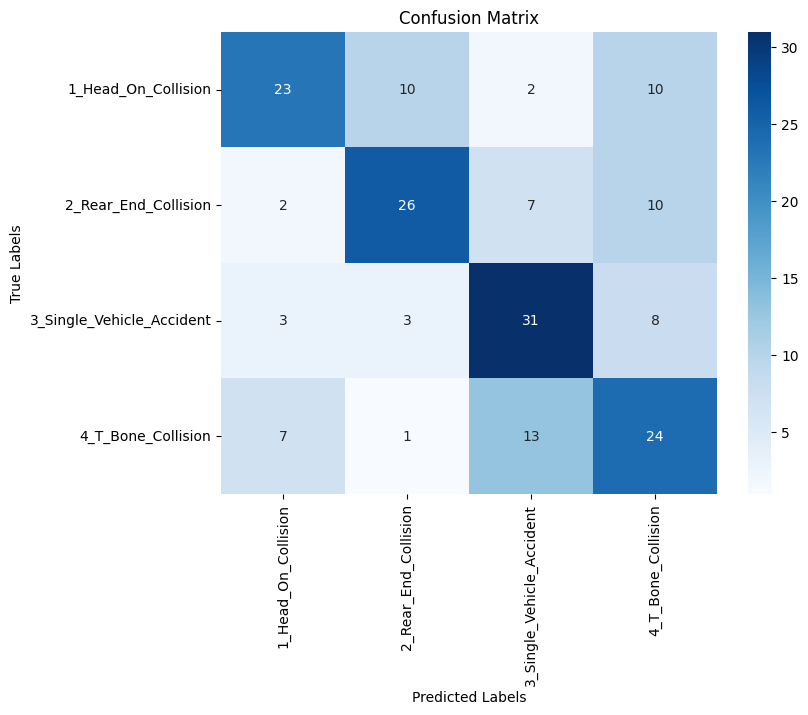

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get true labels and predictions
test_labels = test_generator.classes  # True labels
predictions = model.predict(test_generator)  # Predicted probabilities
predicted_labels = predictions.argmax(axis=1)  # Predicted class indices

# Define class names
class_names = list(test_generator.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)


                           precision    recall  f1-score   support

      1_Head_On_Collision       0.73      0.53      0.62        45
     2_Rear_End_Collision       0.60      0.40      0.48        45
3_Single_Vehicle_Accident       0.56      0.78      0.65        45
       4_T_Bone_Collision       0.49      0.60      0.54        45

                 accuracy                           0.58       180
                macro avg       0.60      0.58      0.57       180
             weighted avg       0.60      0.58      0.57       180

